In [1]:
from neural_flow.utils import (
    rational_quadratic_spline,
    normalize_spline_params,
    squareplus,
)
import matplotlib.pyplot as plt
import numpy as np
from jax.nn import softplus

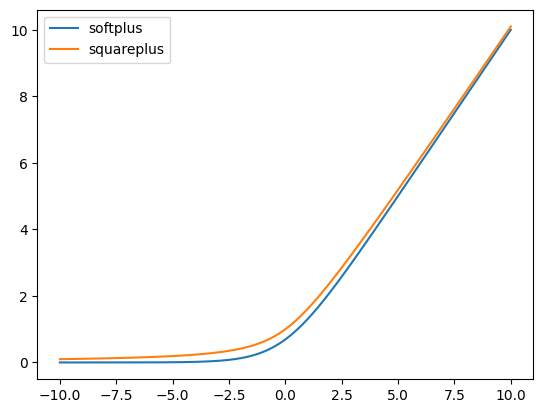

In [2]:
x = np.linspace(-10, 10, 1000)

plt.plot(x, softplus(x), label="softplus")
plt.plot(x, squareplus(x), label="squareplus")
plt.legend();

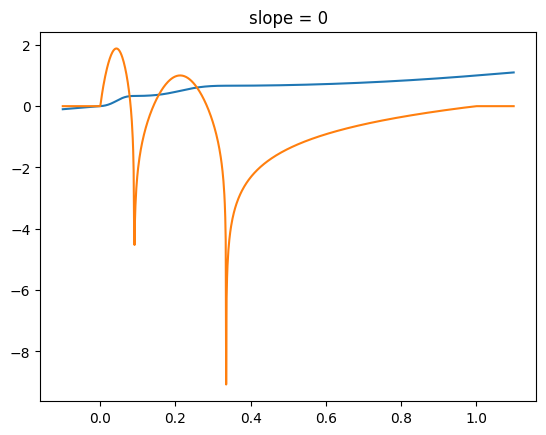

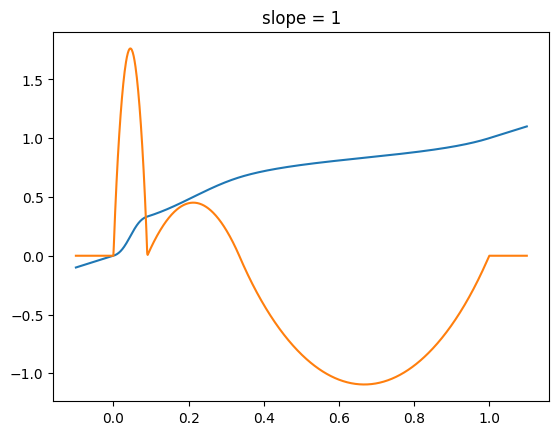

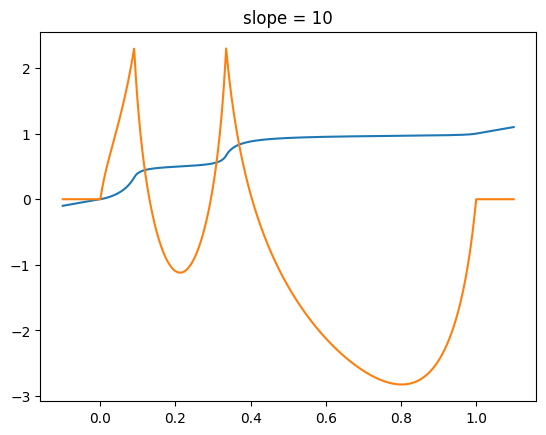

In [3]:
x = np.linspace(-0.1, 1.1, 1000).reshape(1000, 1)

knots = 3
dx, dy, slope = normalize_spline_params(
    np.arange(knots) - 3, np.zeros(knots), np.zeros(knots - 1)
)

nx = np.prod(x.shape)
dx = np.tile(dx, nx).reshape(*x.shape, -1)
dy = np.tile(dy, nx).reshape(*x.shape, -1)
slope = np.tile(slope, nx).reshape(*x.shape, -1)

for sl in (0, 1, 10):
    slope1 = sl * slope
    plt.figure()
    y, log_det = rational_quadratic_spline(x, dx, dy, slope1, False)
    plt.title(f"slope = {sl}")
    plt.plot(x.reshape(-1), y.reshape(-1))
    plt.plot(x.reshape(-1), log_det)

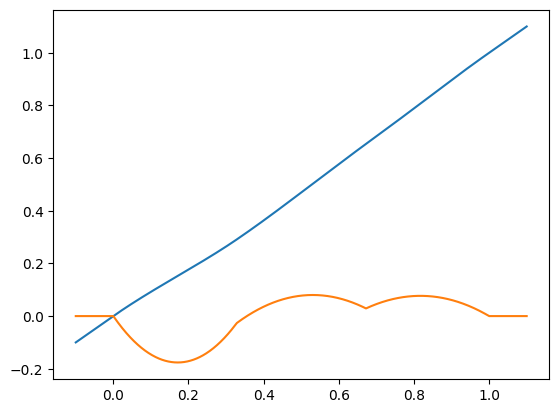

In [4]:
rng = np.random.default_rng(1)

x = np.linspace(-0.1, 1.1, 1000).reshape(1000, 1)

scale = 0.1
knots = 3
dx, dy, slope = normalize_spline_params(
    scale * rng.normal(size=knots),
    scale * rng.normal(size=knots),
    scale * rng.normal(size=knots - 1),
)

nx = np.prod(x.shape)
dx = np.tile(dx, nx).reshape(*x.shape, -1)
dy = np.tile(dy, nx).reshape(*x.shape, -1)
slope = np.tile(slope, nx).reshape(*x.shape, -1)

y, log_det = rational_quadratic_spline(x, dx, dy, slope, False)
plt.plot(x.reshape(-1), y.reshape(-1))
plt.plot(x.reshape(-1), log_det);